<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu.9.3.%EC%9D%80%ED%96%89%EA%B3%A0%EA%B0%9D%EB%B6%84%EB%A5%98.KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 문제 정의
   ( 대출 여부를 결정하는 분류 문제 )

   . 은행에서 수립한 고객 5000 명의 금융 정보에 있는 대출 여부가 들어 잇는 참조 데이터 이용.
  . 대출 여부를 분류하는 가장 최적의 이웃의 크기값을 구하고 분류 정확도를 산출

  . 7:3의 비율로 트레이닝.

  . z 값을 이용하여 정규화 한다.

   ---> 이때 사용하는 알고리즘은 어떤 것을 쓸까?
       ( KNN 알고리즘을 사용하자. 분류 해야 하는 것)

       

 데이터 선택.
   Personal Loan 은 캐글에서 제고하는 5,000 명의 은행 고객의 12가지 속성을 기록한 데이타 셋 활용.

   KNN과 관련이 적은 속성 (ID, ZIP Code )등을 제거한 수정 데이터 셋 사용


   종속 변수 :   Personal Loadn (대출 여부 ) : 1 (대출), 0 ( 거부) 를 분류.
   

In [202]:
import pandas as pd

1. 데이터 로딩

In [203]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv('/content/bank_loan.csv')

df.head(20)

Mounted at /content/drive


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0/30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0/60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8/90,3,0,1,0,0,0,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [205]:
df.shape

(5000, 14)

기존 data를 이용하여 새로운 data를 만났을 때  대출을 할 것인지 아닌지.

고객의 다양한 정보를 이용하여 Load 을 할 것인지 아닌지를 예측하는 것

In [206]:
## 의미 없는 특성을 제거하자.
ploan_processed = df.dropna().drop(["ID", "ZIP Code","CCAvg"], axis=1, inplace=False)


In [207]:

y = ploan_processed["Personal Loan"]
X = ploan_processed.drop(["Personal Loan"], axis=1)   ## Personal Load 만 제거한 것을 X로 저장한다


X

,Age,Experience,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1,0,1,0,0,0
1,45,19,34,3,1,0,1,0,0,0
2,39,15,11,1,1,0,0,0,0,0
3,35,9,100,1,2,0,0,0,0,0
4,35,8,45,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,3,0,0,0,1,0
4996,30,4,15,4,1,85,0,0,1,0
4997,63,39,24,2,3,0,0,0,0,0
4998,65,40,49,3,2,0,0,0,1,0


In [208]:
y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


2. 데이터 전처리.
   표준화 과정을 하자.  normalize

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## stratify 의 의미는 ? . 대출여부의 범주간 비율 차이가 크기가 있더라도 동일한 비율을 가질 수 있도록 하는 것.

(3500, 10) (1500, 10) (3500,) (1500,)


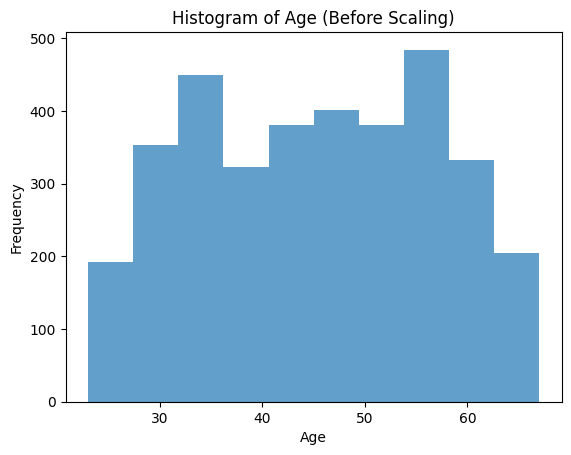

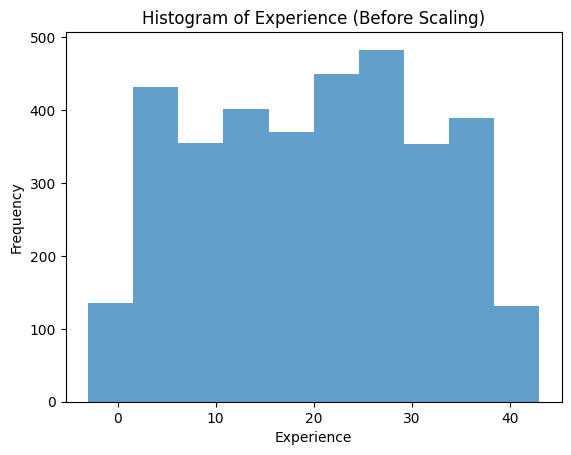

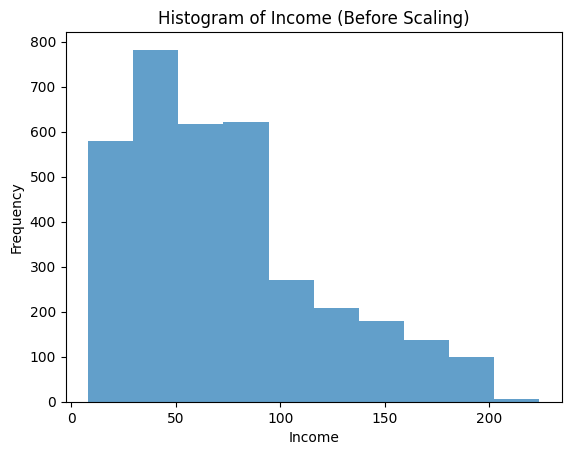

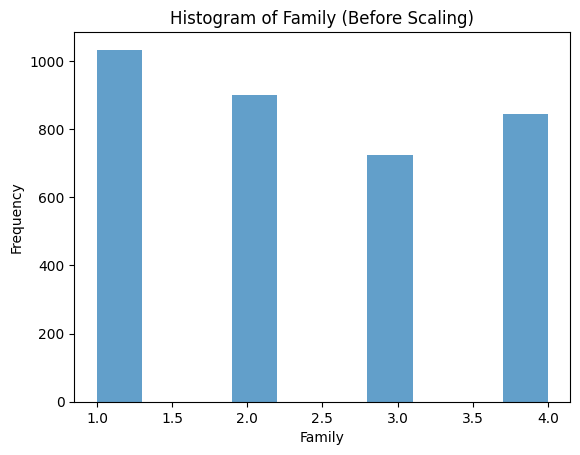

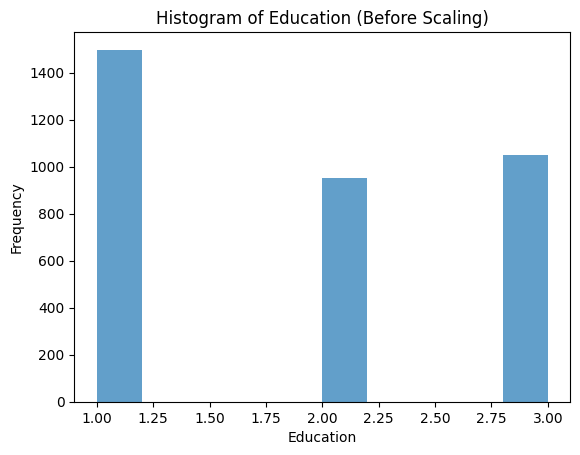

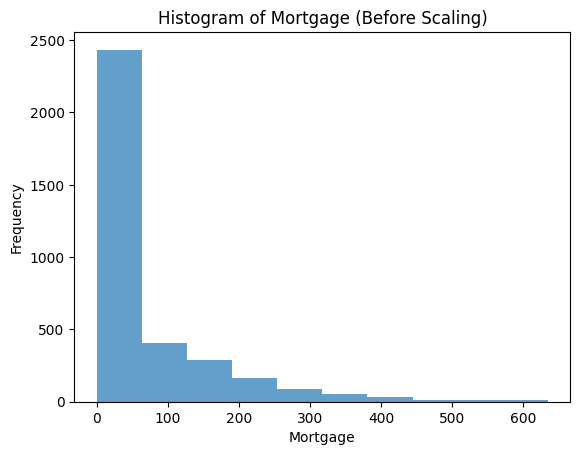

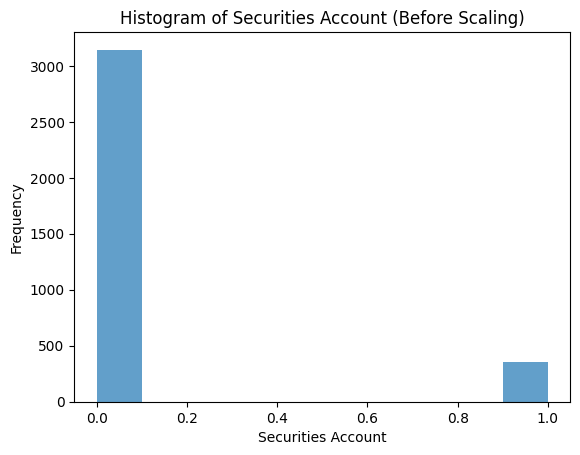

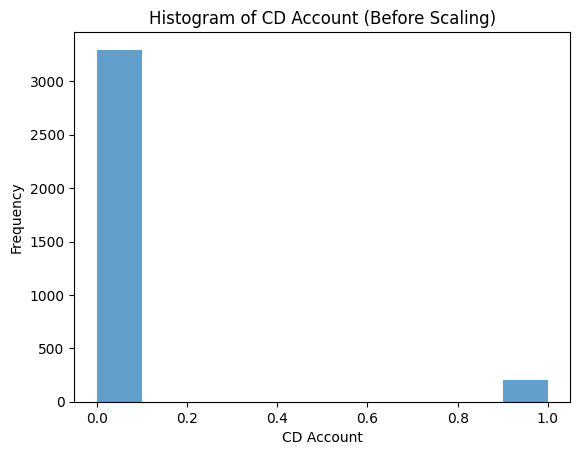

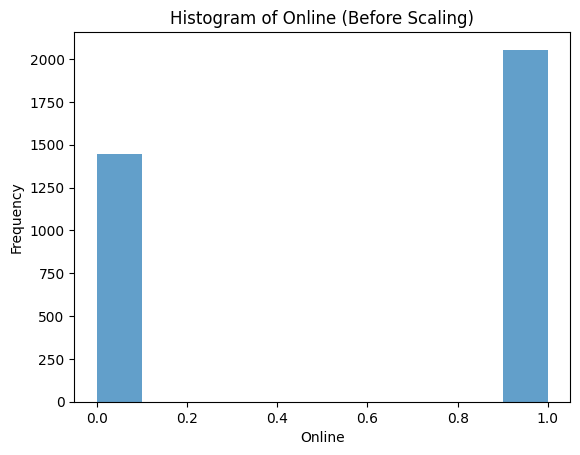

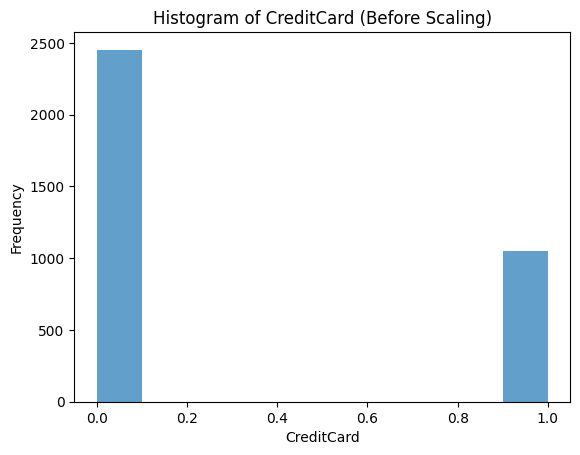

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (your existing code) ...

# Select only numerical features for the histogram
numerical_features = X_train.select_dtypes(include=['number'])

# Iterate and plot histograms for numerical features
for feature in numerical_features.columns:
    plt.hist(numerical_features[feature], bins=10, alpha=0.7)
    plt.title(f"Histogram of {feature} (Before Scaling)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

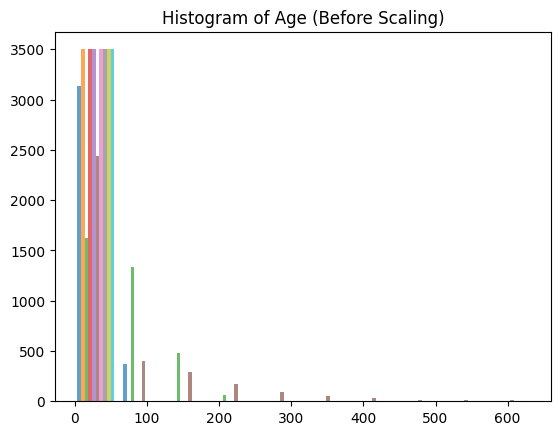

In [211]:
plt.hist(X_train, bins=10, alpha=0.7)
plt.title(f"Histogram of Age (Before Scaling)")
plt.show()

데이터 scalling  (모델의 정확도를 높이기 위해서)

1. StandardScaling()
   . 평균이 0 분산이 1인 정규분포를 갖도록 만들어줌
  .  데이터 내에 이상치가 있다면 데이터의 평균과 분산에 영향을 준다.
2. MinMaxScaler()
   . 모든 피쳐들이 0과 1 사이의 값을 갖도록 만들어 줌.
  . 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포
3. MaxAbsScaler()
   . 모든 피쳐들의 절대값이 0과 1사이에 놓이도록 만들어 줌
  .  즉 0을 기준으로 절대삾이 가장 큰수가 1, 또는 -1의 값을 갖는다.
  . 이상치의 영향을 크게 받
4. RobustScaler()
  .StandardScaler와 비슷
  . 대신 평균과 분산을 하는대신, 중간값과 사분위 값을 사용하도록 .
  . 이상치의 영향을 최소화 하기 위
5. Normalize()
   . 위 4가지는 피쳐의 통계값을 이용 ( 열 을 대상으로 함)
  . NOrmalizer는 각 행의 data를 정규화가 진행되도록 한다.
  . 한 행의 모든 피쳐들ㅇ 사이의 유클리드 거리가 1이 되도록 한다.
   . 빠르게 할 수 있다는 장점.

In [212]:
import sklearn.preprocessing as preprocessing
preprocessor = preprocessing.Normalizer()

X_train = preprocessor.fit_transform(X_train)  ## 학습용
X_test = preprocessor.transform(X_test)  ## test 용

X_train.shape, X_test.shape

((3500, 10), (1500, 10))

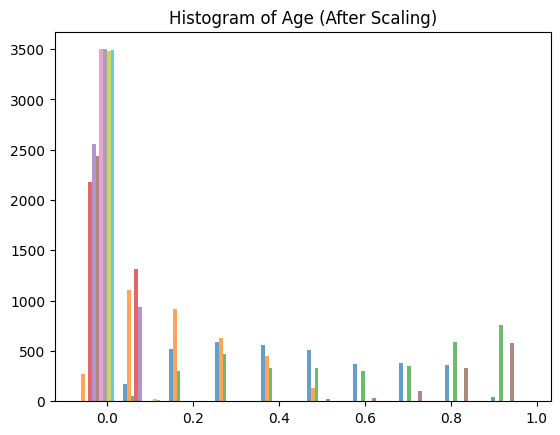

In [213]:
plt.hist(X_train, bins=10, alpha=0.7)
plt.title(f"Histogram of Age (After Scaling)")
plt.show()

In [214]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


KNN의 K값을 변경하면서 성능 평가를 하기 위한 code.

In [215]:
training_accuracy = []
test_accuracy = []

In [216]:
neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))



K의 변화량에 따른 예측 정확도 성능 비교


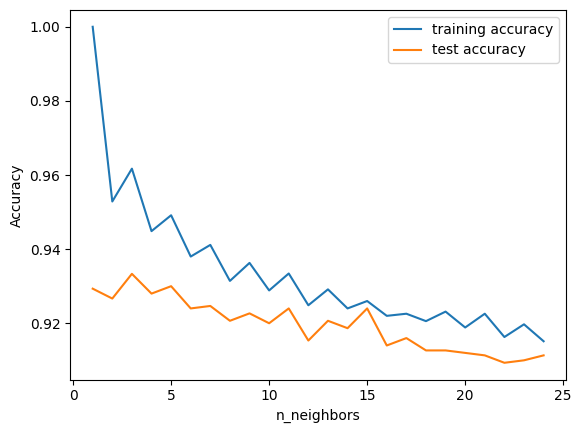

In [217]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

4. 최적의 이웃 수 산출

In [219]:
test_accuracy

[0.9293333333333333,
 0.9266666666666666,
 0.9333333333333333,
 0.928,
 0.93,
 0.924,
 0.9246666666666666,
 0.9206666666666666,
 0.9226666666666666,
 0.92,
 0.924,
 0.9153333333333333,
 0.9206666666666666,
 0.9186666666666666,
 0.924,
 0.914,
 0.916,
 0.9126666666666666,
 0.9126666666666666,
 0.912,
 0.9113333333333333,
 0.9093333333333333,
 0.91,
 0.9113333333333333]

In [ ]:
## 최적의 K는 3 인것 같다.



분류 문제를 해결하기 위해 KNN 알고리즘을 사용하였다. 다른 분류 알고리즘을 사용했을 때 어떤 성능을 나오는는지 확인해 보자.